# OG Ski-Rental Experiments

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Read entire df

In [2]:
frames = []
for main_user_strategy in ["RANDOM", "KEEP-RENTING", "INSTANT-BUY", "DET", "RAND", "A-ADAPTED"]:
    df_temp = pd.read_csv(
        f"Model/Experiments/og-ski-rental/output/data/og-ski-rental_{main_user_strategy}_50.csv")
    frames.append(df_temp)
df = pd.concat(frames)

keep_columns = ["RunId", "main_user_strategy", "AgentID", "active",
                "state", "bought_at_day", "max_days", "VET", "VTHO","initial_buy_price", "total_FIAT_spent_rent", "total_FIAT_spent_buying", "optimal", "main_user_CR"]

df = df[keep_columns]
df = df.groupby("AgentID")
df = df.get_group(1)
# df = df[df["main_user_strategy"] != "RANDOM"]
# df = df[df["main_user_strategy"] != "KEEP-RENTING"]
# df = df[df["main_user_strategy"] != "INSTANT-BUY"]
df

,RunId,main_user_strategy,AgentID,active,state,bought_at_day,max_days,VET,VTHO,initial_buy_price,total_FIAT_spent_rent,total_FIAT_spent_buying,optimal,main_user_CR
0,0,RANDOM,1,False,RENTING,0,41,0,0,10.0,42,0.0,10.0,4.100000
1,1,RANDOM,1,False,BOUGHT,22,39,0,0,10.0,22,10.0,10.0,3.200000
2,2,RANDOM,1,False,BOUGHT,2,27,0,0,10.0,2,10.0,10.0,1.200000
3,3,RANDOM,1,False,RENTING,0,29,0,0,10.0,30,0.0,10.0,2.900000
4,4,RANDOM,1,False,BOUGHT,6,7,0,0,10.0,6,10.0,7.0,2.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,A-ADAPTED,1,False,BOUGHT,9,47,0,0,10.0,9,10.0,10.0,1.900000
9996,9996,A-ADAPTED,1,False,BOUGHT,9,43,0,0,10.0,9,10.0,10.0,1.900000
9997,9997,A-ADAPTED,1,False,BOUGHT,9,23,0,0,10.0,9,10.0,10.0,1.900000
9998,9998,A-ADAPTED,1,False,BOUGHT,9,27,0,0,10.0,9,10.0,10.0,1.900000


### Maximum CR per algorithm

In [3]:
pd.DataFrame(df.groupby(["main_user_strategy"])["main_user_CR"].max()).reset_index()


,main_user_strategy,main_user_CR
0,A-ADAPTED,1.9
1,DET,2.0
2,INSTANT-BUY,10.0
3,KEEP-RENTING,5.0
4,RAND,10.0
5,RANDOM,5.9


### Mean CR per algorithm

In [4]:
pd.DataFrame(df.groupby(["main_user_strategy"])["main_user_CR"].mean()).reset_index()

,main_user_strategy,main_user_CR
0,A-ADAPTED,1.727380
1,DET,1.802700
2,INSTANT-BUY,1.391217
3,KEEP-RENTING,2.629000
4,RAND,1.528154
5,RANDOM,2.279356


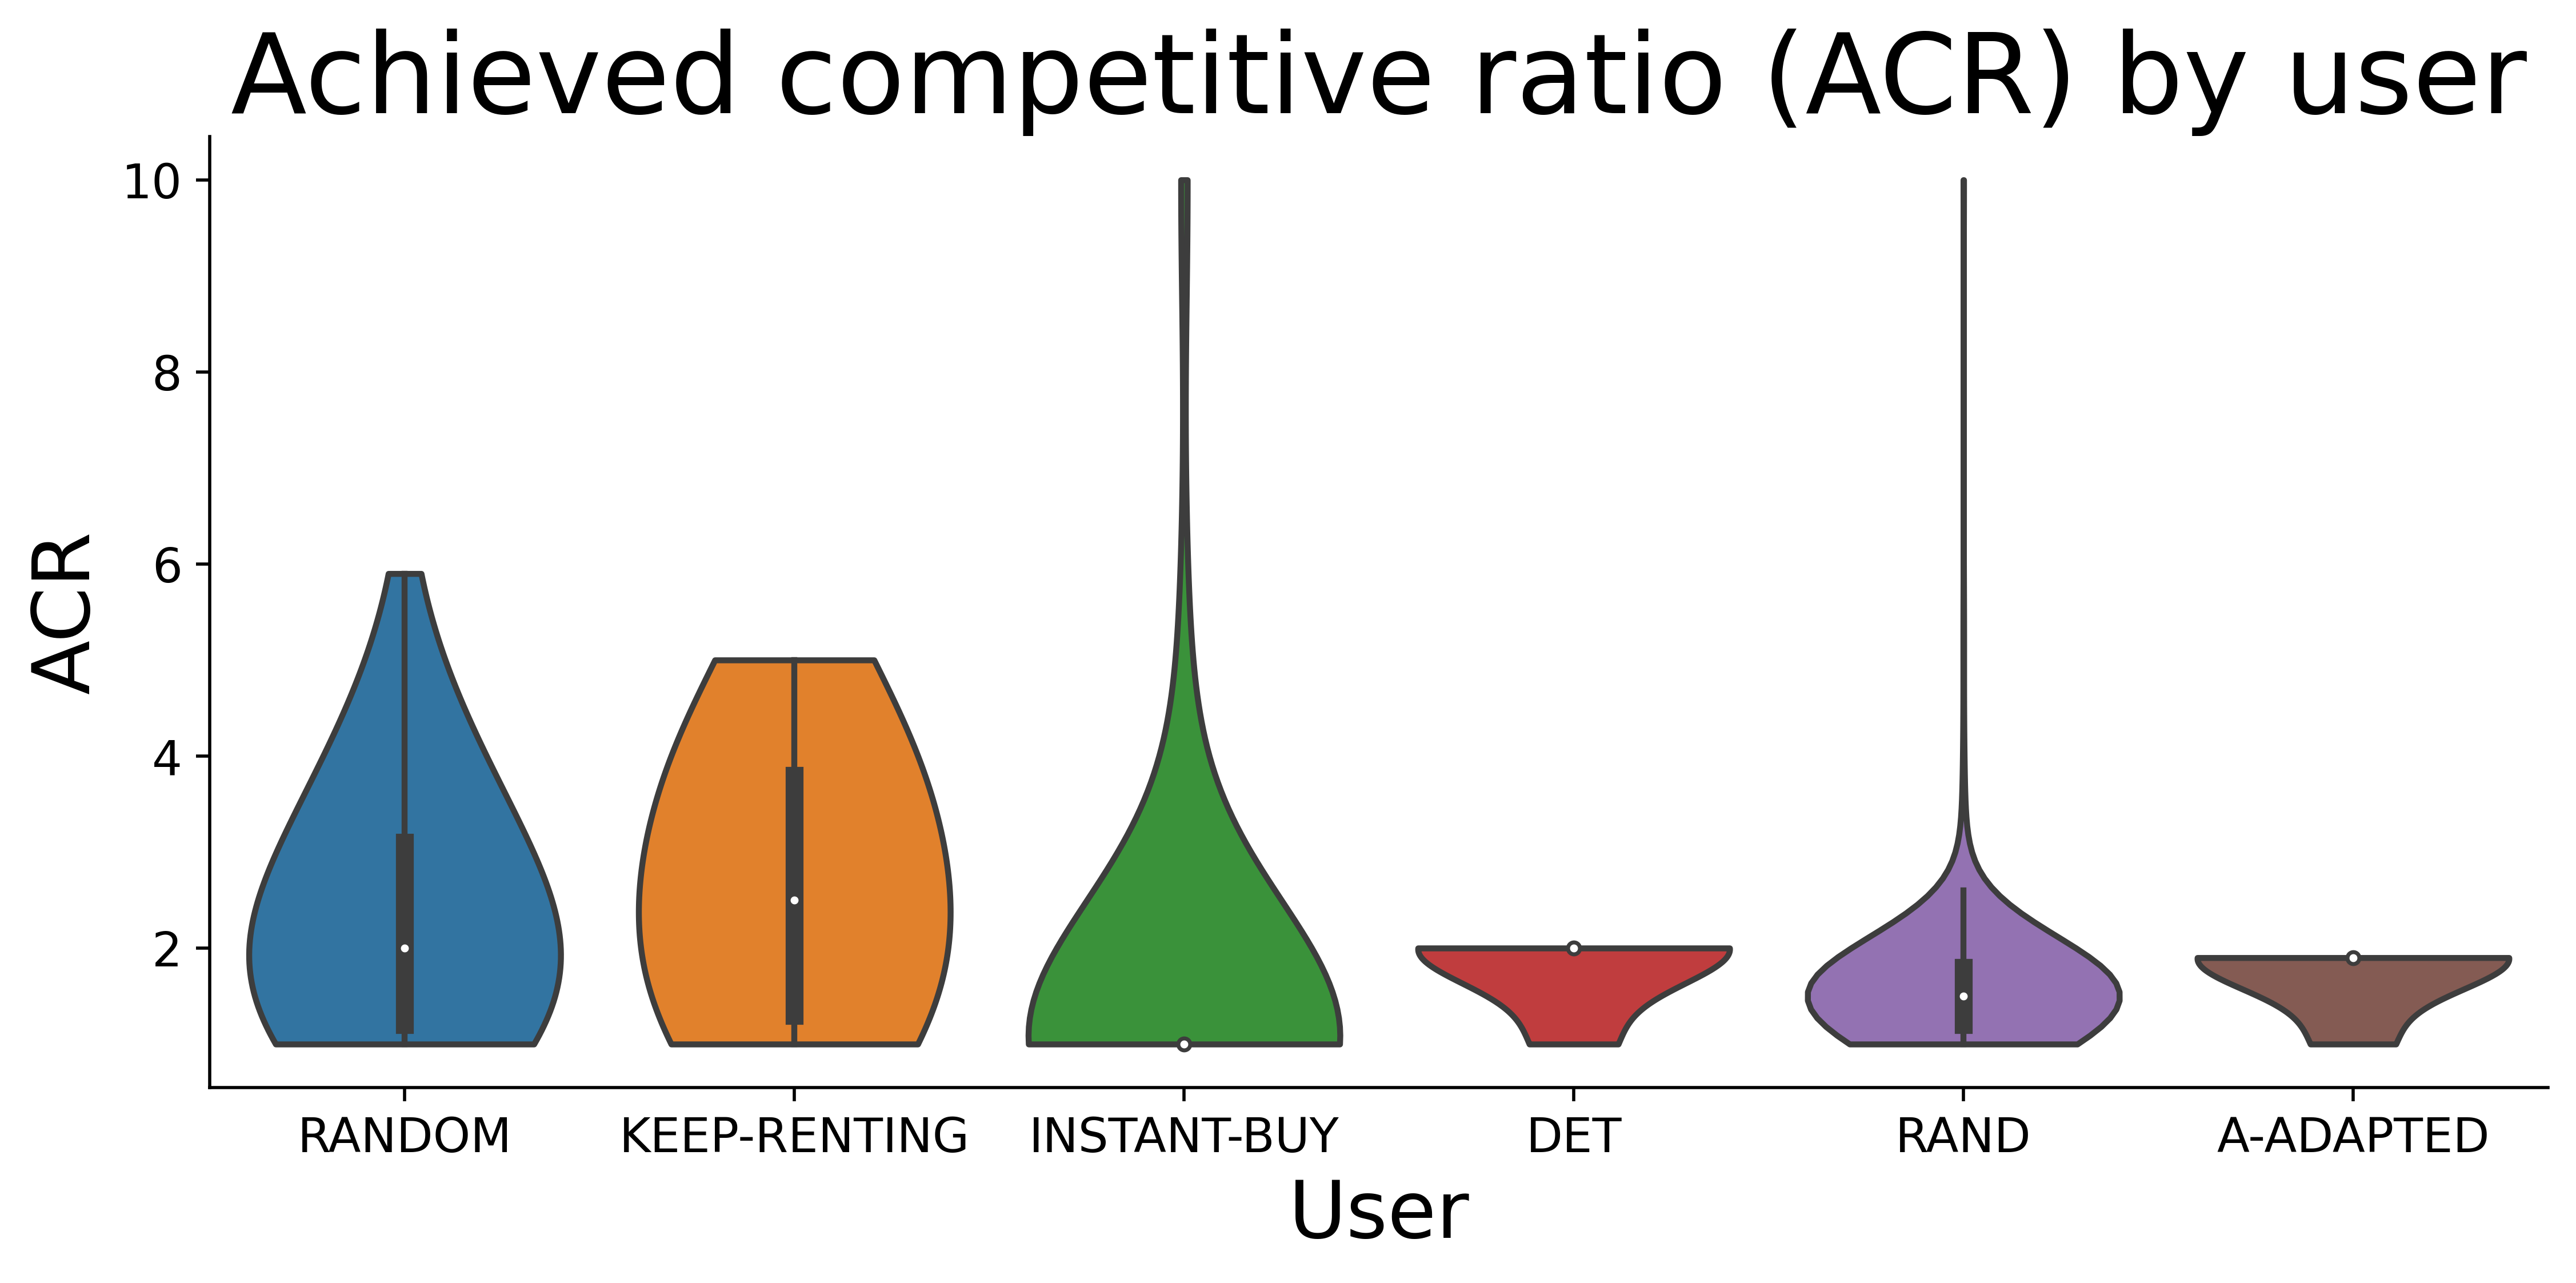

In [5]:
# df2 = df[df["main_user_strategy"] != "RANDOM"]
# df2 = df2[df2["main_user_strategy"] != "KEEP-RENTING"]
# df2 = df2[df2["main_user_strategy"] != "INSTANT-BUY"]

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=500)
plt.tight_layout(pad=5.0)
plt.title("Achieved competitive ratio (ACR) by user", fontsize=28)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

sns.violinplot(x="main_user_strategy", y="main_user_CR",
               data=df, bw=1, cut=0, scale="width")


ax.set_ylabel('ACR', fontsize=20)
ax.set_xlabel('User', fontsize=20)
ax.tick_params(axis='y')
# plt.ylim(0.5,2.5)

# ax.legend()
sns.despine(offset=0, trim=False, left=False)
plt.savefig("Model/Experiments/og-ski-rental/output/img/og-ski-rental-CR-by-user.pdf",
            format="pdf", bbox_inches="tight")
plt.savefig("Presentation/og-ski-rental-CR-by-user.png",
            format="png", bbox_inches="tight")


c:\Users\Boris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Boris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Boris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Boris\anacond

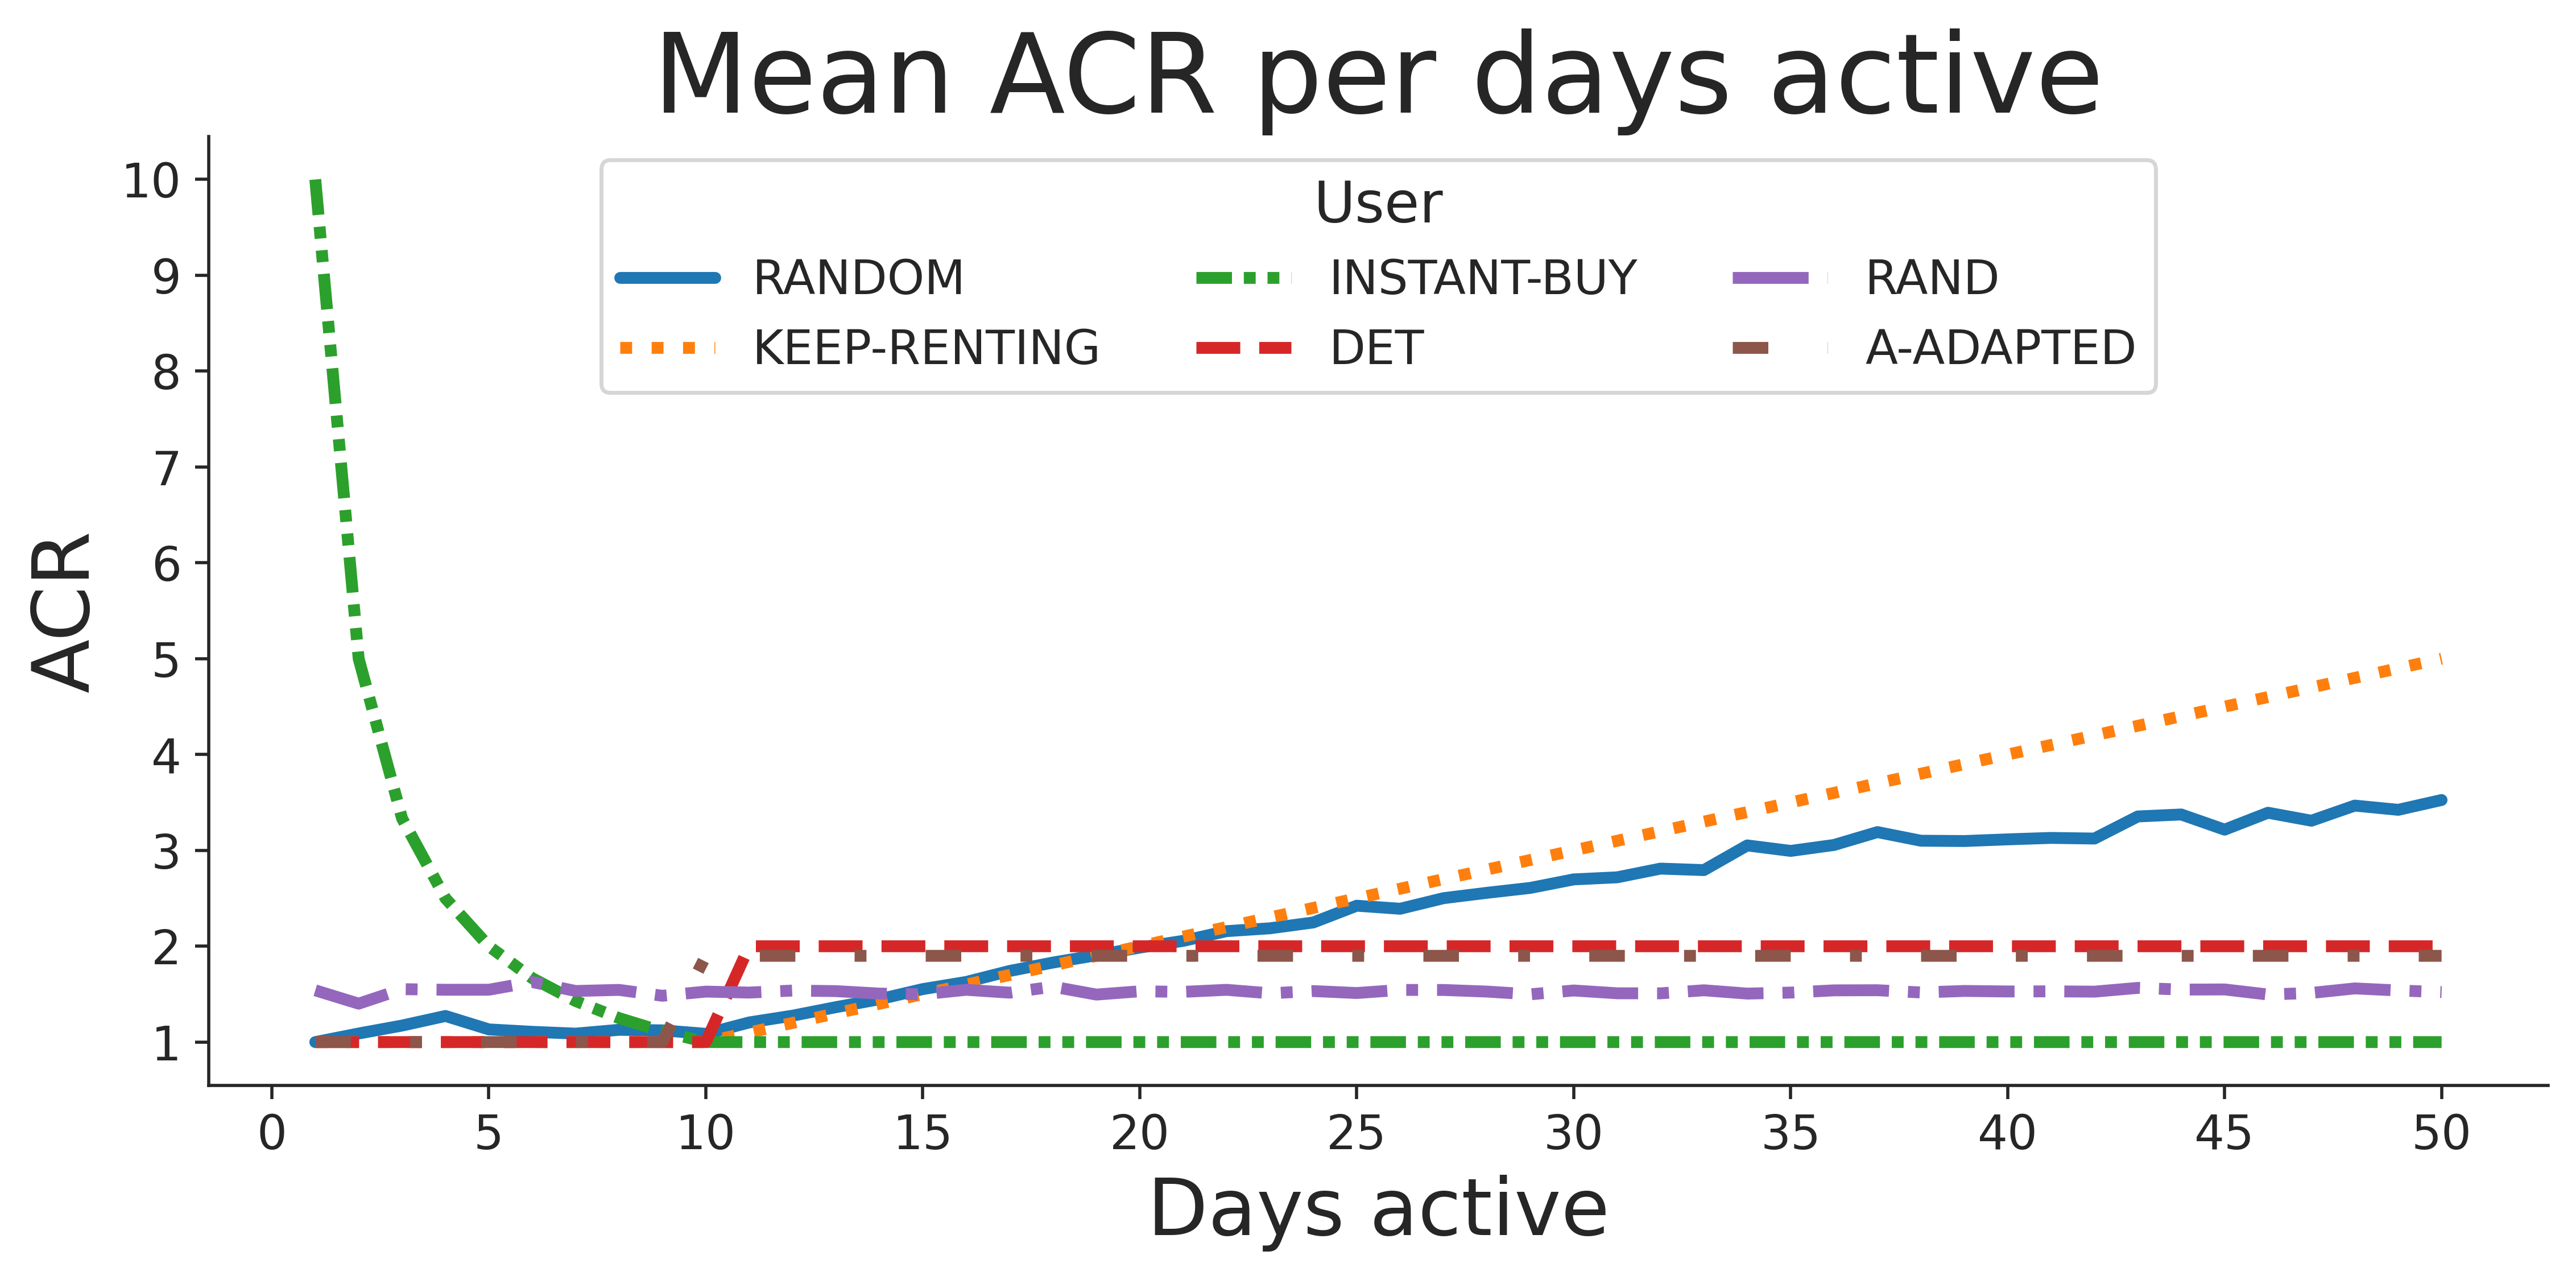

In [6]:
# Initialize plot
with sns.axes_style("ticks"):
    plt.rcParams['legend.title_fontsize'] = 'x-large'
    fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=500)
    plt.tight_layout(pad=5.0)
    plt.title("Mean ACR per days active", fontsize=28)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    _styles = ["solid", "dotted", (0, (3, 1, 1, 1, 1, 1)), "dashed", "dashdot", (0, (3, 5, 1, 5))]

    for i, main_user_strategy in enumerate(["RANDOM", "KEEP-RENTING", "INSTANT-BUY", "DET", "RAND", "A-ADAPTED"]):
        df2 = df.groupby("main_user_strategy")
        df2 = df2.get_group(main_user_strategy)
        # unique_values = df2[['max_days', 'main_user_CR']].drop_duplicates()
        averages = df2.groupby("max_days").agg("mean")["main_user_CR"]
        sns.lineplot(range(1, 51), averages, label=main_user_strategy, linestyle=_styles[i], linewidth=3)

    ax.set_ylabel('ACR', fontsize=20)
    ax.set_xlabel('Days active', fontsize=20)

    ax.set_xticks(range(0,51,5))
    ax.set_xticklabels(labels=range(0,51,5))
    ax.set_yticks(range(1,11))
    ax.set_yticklabels(labels=range(1,11))
    ax.legend(title="User", fontsize=12, loc="upper center", ncol=3)

    sns.despine(offset=0, trim=False, left=False)

plt.savefig("Model/Experiments/og-ski-rental/output/img/og-ski-rental-CR-per-days-active.pdf",
            format="pdf", bbox_inches="tight")
plt.savefig("Presentation/og-ski-rental-CR-per-days-active.png",
            format="png", bbox_inches="tight")


In [7]:
for i, main_user_strategy in enumerate(["RAND"]):
    df2 = df.groupby("main_user_strategy")
    df2 = df2.get_group(main_user_strategy)
    # unique_values = df2[['max_days', 'main_user_CR']].drop_duplicates()
    averages = df2.groupby("max_days").agg("mean")["main_user_CR"]

np.max(averages) #1.6267605633802817
averages

max_days
1     1.540000
2     1.400990
3     1.552189
4     1.545918
5     1.546316
6     1.626761
7     1.533287
8     1.544479
9     1.483254
10    1.526768
11    1.516580
12    1.537629
13    1.531731
14    1.505970
15    1.498537
16    1.545540
17    1.515657
18    1.578142
19    1.495714
20    1.529891
21    1.524138
22    1.545320
23    1.509000
24    1.532243
25    1.511872
26    1.544172
27    1.543781
28    1.526961
29    1.498507
30    1.538308
31    1.509174
32    1.508649
33    1.540625
34    1.505946
35    1.516514
36    1.539791
37    1.541148
38    1.517703
39    1.533333
40    1.528293
41    1.529442
42    1.526341
43    1.565445
44    1.547692
45    1.549268
46    1.496277
47    1.512755
48    1.560000
49    1.538537
50    1.521918
Name: main_user_CR, dtype: float64